In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# here we have imported the neccesary library

In [2]:
calhouse = pd.read_csv('cleaned_california.csv')
calhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
calhouse.head()
#displays the first 5 elements
# here we have the values of the cleaned data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Since we have to calucalte and predict the value of the house we will take the median_house_value as the y variable

In [4]:
# since we are going to do training as well as the testing of the data
# we need to import some more libraires
from sklearn.model_selection import train_test_split

x = calhouse.drop(['median_house_value'], axis=1)
y = calhouse['median_house_value']
# here we have made the x and y train dataset.
# we have dropped the y train which is the median house value which will intern will be the hosue cost


In [5]:
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size=0.2)
trained_data = X_train.join(y_train)
# using this we are going to x train and y train mechanism where we have taken the size of 0.2
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16970,-122.15,37.46,42.0,1995.0,412.0,794.0,374.0,5.6234,NEAR BAY,379600.0
18326,-121.96,37.13,26.0,50.0,5.0,17.0,4.0,15.0001,<1H OCEAN,400000.0
15132,-117.30,33.06,24.0,2171.0,511.0,870.0,442.0,3.1940,NEAR OCEAN,276300.0
436,-122.30,37.86,50.0,499.0,127.0,287.0,128.0,2.7500,NEAR BAY,140600.0
18011,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,<1H OCEAN,311600.0
...,...,...,...,...,...,...,...,...,...,...
6553,-118.14,34.17,42.0,2757.0,713.0,2112.0,653.0,2.7148,<1H OCEAN,166800.0
20396,-121.54,39.13,18.0,4289.0,1021.0,2707.0,939.0,1.3375,INLAND,59600.0
2186,-119.87,36.83,4.0,4833.0,784.0,2088.0,789.0,5.1781,INLAND,122500.0
11776,-117.35,33.98,31.0,4163.0,1242.0,3928.0,1076.0,1.6943,INLAND,85900.0


Here we have created a new train test and split column and made the median value.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

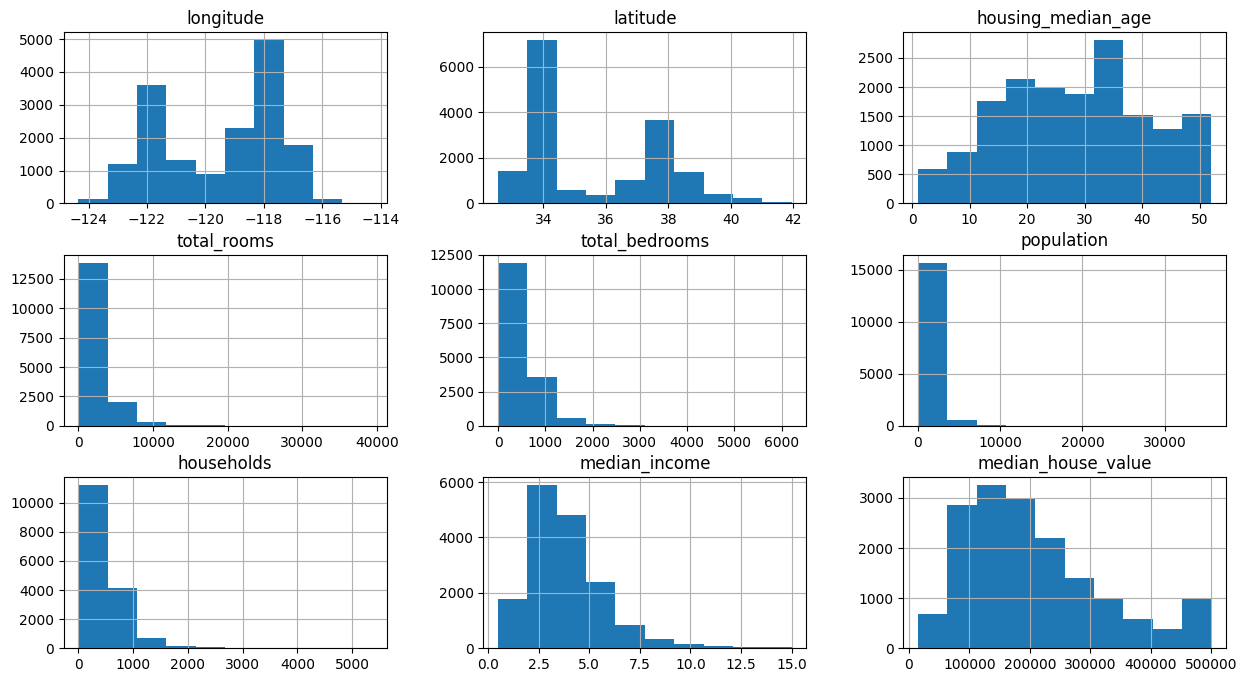

In [6]:
trained_data.hist(figsize=(15 , 8))
# Here we have made the figsize where each variable has been compared with the y trained variable

# Now that we have created a base model we are going to do some data Preprocessing


In [7]:
trained_data['total_rooms'] = np.log(trained_data['total_rooms'] +1)
trained_data['total_bedrooms'] = np.log(trained_data['total_bedrooms'] +1)
trained_data['population'] = np.log(trained_data['population'] +1)
trained_data['households'] = np.log(trained_data['households'] +1)
# this helps the transformation to normalize the skewed data.It makes it more suitbale for making linear models.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

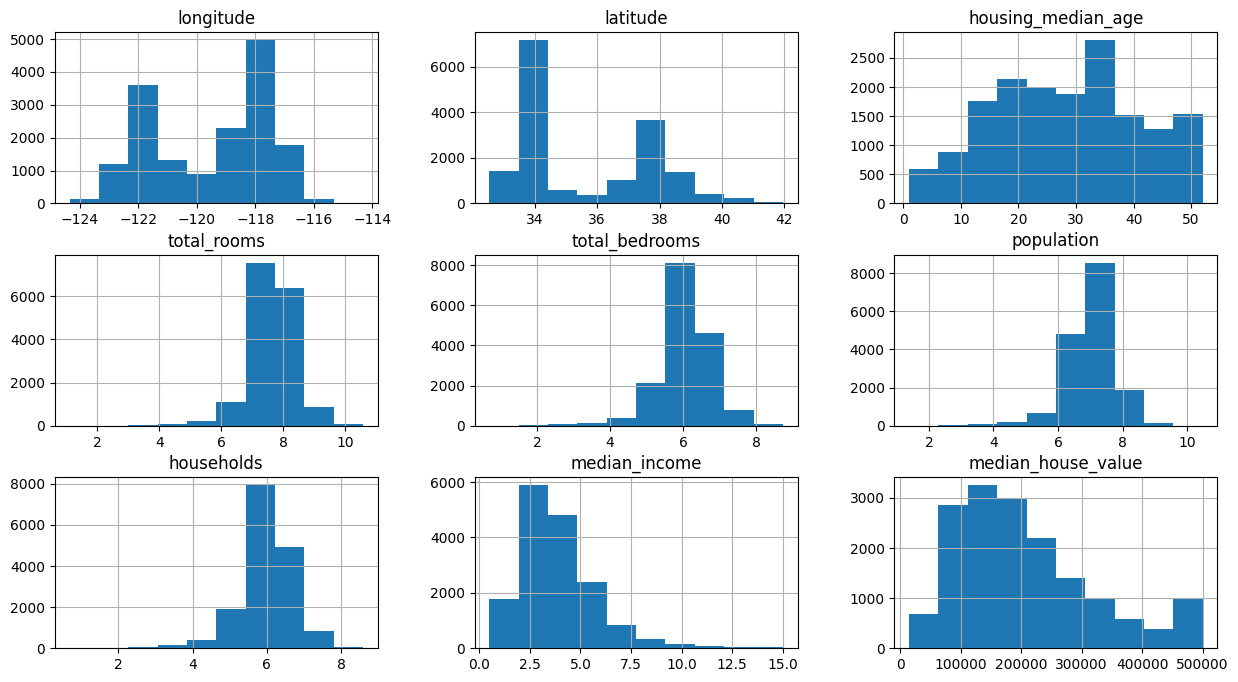

In [8]:
trained_data.hist(figsize = (15 , 8))
# this is going to print the graphs of the the given varibales.


# Here we have made the hist of the plot data

In [9]:
trained_data.columns
# here we have a coloumn called as ocean proximity which is a string value varible.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

So we are going to take this out and instead of the values we are going to take the numbers as input

In [10]:
# here we are going to count the no of times each of the ocean promximity values was there
trained_data.ocean_proximity.value_counts()
# we have got the values of the given varibale 
# these are the counts of the 


ocean_proximity
<1H OCEAN     7222
INLAND        5211
NEAR OCEAN    2128
NEAR BAY      1780
ISLAND           5
Name: count, dtype: int64

In [11]:
pd.get_dummies(trained_data.ocean_proximity).astype(int)
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16970,-122.15,37.46,42.0,7.598900,6.023448,6.678342,5.926926,5.6234,NEAR BAY,379600.0
18326,-121.96,37.13,26.0,3.931826,1.791759,2.890372,1.609438,15.0001,<1H OCEAN,400000.0
15132,-117.30,33.06,24.0,7.683404,6.238325,6.769642,6.093570,3.1940,NEAR OCEAN,276300.0
436,-122.30,37.86,50.0,6.214608,4.852030,5.662960,4.859812,2.7500,NEAR BAY,140600.0
18011,-122.04,37.37,33.0,7.922261,6.194405,7.091742,6.177944,5.0453,<1H OCEAN,311600.0
...,...,...,...,...,...,...,...,...,...,...
6553,-118.14,34.17,42.0,7.922261,6.570883,7.655864,6.483107,2.7148,<1H OCEAN,166800.0
20396,-121.54,39.13,18.0,8.364042,6.929517,7.903966,6.845880,1.3375,INLAND,59600.0
2186,-119.87,36.83,4.0,8.483430,6.665684,7.644441,6.672033,5.1781,INLAND,122500.0
11776,-117.35,33.98,31.0,8.334231,7.125283,8.276140,6.981935,1.6943,INLAND,85900.0


now what we have to do is asign the values of the ocean proximity to the new values and make seperate columns for each of the values of the count

In [ ]:
#now what we have to 

In [12]:
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16970,-122.15,37.46,42.0,7.598900,6.023448,6.678342,5.926926,5.6234,NEAR BAY,379600.0
18326,-121.96,37.13,26.0,3.931826,1.791759,2.890372,1.609438,15.0001,<1H OCEAN,400000.0
15132,-117.30,33.06,24.0,7.683404,6.238325,6.769642,6.093570,3.1940,NEAR OCEAN,276300.0
436,-122.30,37.86,50.0,6.214608,4.852030,5.662960,4.859812,2.7500,NEAR BAY,140600.0
18011,-122.04,37.37,33.0,7.922261,6.194405,7.091742,6.177944,5.0453,<1H OCEAN,311600.0
...,...,...,...,...,...,...,...,...,...,...
6553,-118.14,34.17,42.0,7.922261,6.570883,7.655864,6.483107,2.7148,<1H OCEAN,166800.0
20396,-121.54,39.13,18.0,8.364042,6.929517,7.903966,6.845880,1.3375,INLAND,59600.0
2186,-119.87,36.83,4.0,8.483430,6.665684,7.644441,6.672033,5.1781,INLAND,122500.0
11776,-117.35,33.98,31.0,8.334231,7.125283,8.276140,6.981935,1.6943,INLAND,85900.0


using p

# Now we are going to make the linear regreassion plot after this

In [13]:
from sklearn.linear_model import LinearRegression

X_train , y_train = trained_data.drop(['median_house_value'],axis = 1), trained_data['median_house_value']
# here we have taken the 
reg = LinearRegression()
# loading the liner regression model and library




In [14]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

forest_model.fit(X_train , y_train)



ValueError: could not convert string to float: 'NEAR BAY'